In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
df = pd.read_csv("superstore_data.csv")

In [3]:
df["Response"].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

In [4]:
LABELS = ["No entra", "Entra en el Programa"]
def mostrar_resultados(Y_test, pred_Y):
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(Y_test, pred_Y)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS,
                annot=True, fmt="d");
    plt.title("Matriz de Confusión")
    plt.ylabel('Resultado Real')
    plt.xlabel('Resultado predicho')
    plt.show()

In [5]:
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [8]:
hoy = datetime.now()
df['TimeClient'] = (hoy - df['Dt_Customer']).dt.days

In [9]:
df = df.drop('Dt_Customer', axis=1)

In [10]:
df_dummies_col1 = pd.get_dummies(df['Education'], prefix='Education')
df_dummies_col2 = pd.get_dummies(df['Marital_Status'], prefix='MarStts')

In [11]:
df = pd.concat([df, df_dummies_col1, df_dummies_col2], axis=1)

In [12]:
df = df.drop(['Education', 'Marital_Status'], axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2216 non-null   int64  
 1   Year_Birth            2216 non-null   int64  
 2   Income                2216 non-null   float64
 3   Kidhome               2216 non-null   int64  
 4   Teenhome              2216 non-null   int64  
 5   Recency               2216 non-null   int64  
 6   MntWines              2216 non-null   int64  
 7   MntFruits             2216 non-null   int64  
 8   MntMeatProducts       2216 non-null   int64  
 9   MntFishProducts       2216 non-null   int64  
 10  MntSweetProducts      2216 non-null   int64  
 11  MntGoldProds          2216 non-null   int64  
 12  NumDealsPurchases     2216 non-null   int64  
 13  NumWebPurchases       2216 non-null   int64  
 14  NumCatalogPurchases   2216 non-null   int64  
 15  NumStorePurchases     2216

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [15]:
x = df.drop(["Response"], axis=1)
y = df.Response

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42, shuffle=True)

In [34]:
xgb_classifier = XGBClassifier( booster='gbtree',
              colsample_bytree=0.5, learning_rate=0.15, max_depth=1,
              min_child_weight=2, n_estimators=300, n_jobs=-1, 
              objective='binary:logistic')

In [35]:
xgb_classifier.fit(X_train, y_train)

c:\Users\GGudino\OneDrive - COA S.A\Documentos\GitHub\TP_aprendizaje_automatico\venv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\GGudino\OneDrive - COA S.A\Documentos\GitHub\TP_aprendizaje_automatico\venv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\GGudino\OneDrive - COA S.A\Documentos\GitHub\TP_aprendizaje_automatico\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\GGudino\OneDrive - COA S.A\Documentos\GitHub\TP_aprendizaje_automatico\venv\Lib\site-

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
probabilidades_prediccion = xgb_classifier.predict_proba(X_test)

c:\Users\GGudino\OneDrive - COA S.A\Documentos\GitHub\TP_aprendizaje_automatico\venv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\GGudino\OneDrive - COA S.A\Documentos\GitHub\TP_aprendizaje_automatico\venv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\GGudino\OneDrive - COA S.A\Documentos\GitHub\TP_aprendizaje_automatico\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\GGudino\OneDrive - COA S.A\Documentos\GitHub\TP_aprendizaje_automatico\venv\Lib\site-

In [37]:
predict_prob = probabilidades_prediccion[:, 1]

In [38]:
predict = predict_prob >= 0.1

In [39]:
len(predict)

665

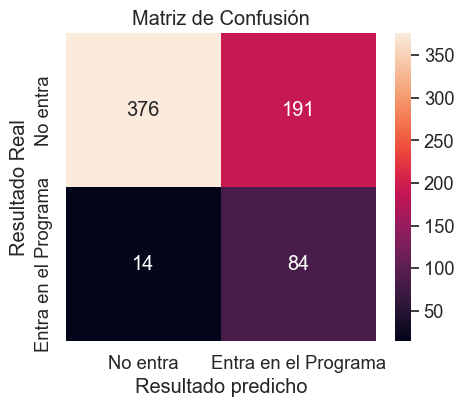

In [40]:
mostrar_resultados(y_test, predict)

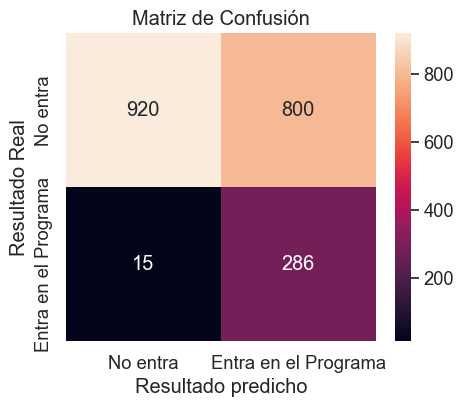

In [41]:
confusion_matrix = [[920, 800], [15, 286]]
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS,
            annot=True, fmt="d");
plt.title("Matriz de Confusión")
plt.ylabel('Resultado Real')
plt.xlabel('Resultado predicho')
plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score
add_metric(id="my_metric_", name="My Metric2", score_func = balanced_accuracy_score) # add_metric -> pycaret

model1 = create_model('rf', fold=5)
tuned_model = tune_model(model1, optimize='Recall')